# **🚀 STEP 8: XGBoost Forecasting Model (Industry Model)**

**STEP 8.1 — Load Feature-Engineered Data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\lalit\Desktop\solar_wind_ai_project\data\processed\solar_features.csv")

In [3]:
df.head()

,DATE_TIME,DC_POWER,AC_POWER,hour,day,month,dayofweek,ac_lag_1,ac_lag_2,ac_lag_24,dc_lag_1,dc_lag_2,dc_lag_24,ac_roll_mean_3,ac_roll_mean_6,dc_roll_mean_3,dc_roll_mean_6
0,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-15 00:15:00,0.0,0.0,0,15,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**STEP 8.2 — Define Features (X) and Target (y)**

In [4]:
X = df.drop(columns=['AC_POWER', 'DATE_TIME'])
y = df['AC_POWER']


**STEP 8.3 — Train–Test Split (Time-Series Correct Way)**

In [5]:
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


**STEP 8.4 — Train XGBoost Model**

In [6]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

**STEP 8.5 — Make Predictions**

In [7]:
y_pred = model.predict(X_test)


**STEP 8.6 — Evaluate Model Performance**

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.8772897609492963
RMSE: 2.416500083014754


MAE: 0.825976495668785
RMSE: 2.244806907994193

**STEP 8.7 — Plot Actual vs Predicted**

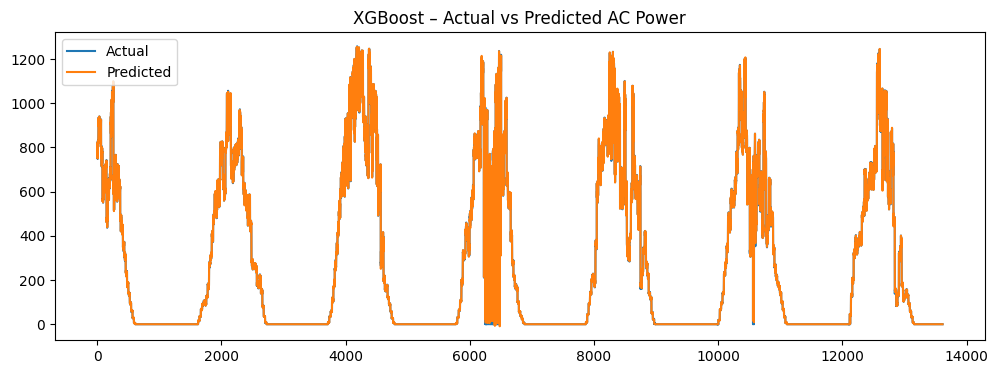

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("XGBoost – Actual vs Predicted AC Power")
plt.show()


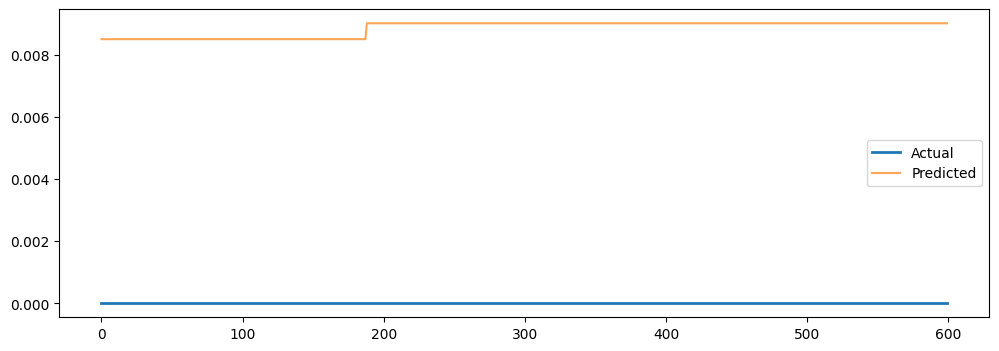

In [10]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values[3000:3600], label='Actual', linewidth=2)
plt.plot(y_pred[3000:3600], label='Predicted', alpha=0.7)
plt.legend()
plt.show()


**STEP 8.8 — Feature Importance (VERY IMPORTANT)**

In [11]:
importances = model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

imp_df.head(10)


,Feature,Importance
0,DC_POWER,0.602910
11,ac_roll_mean_3,0.311890
13,dc_roll_mean_3,0.084044
5,ac_lag_1,0.000404
6,ac_lag_2,0.000364
9,dc_lag_2,0.000179
8,dc_lag_1,0.000147
12,ac_roll_mean_6,0.000043
14,dc_roll_mean_6,0.000004
7,ac_lag_24,0.000004


**Save Files**

In [12]:
import os
import pandas as pd

base_path = r"C:\Users\lalit\Desktop\solar_wind_ai_project"
output_path = os.path.join(base_path, "outputs")

print("Saving to:", output_path)

os.makedirs(output_path, exist_ok=True)

xgb_y_test_path = os.path.join(output_path, "y_test_xgb.csv")
xgb_pred_path   = os.path.join(output_path, "xgb_predictions.csv")

pd.DataFrame(y_test).to_csv(xgb_y_test_path, index=False)
pd.DataFrame(y_pred).to_csv(xgb_pred_path, index=False)

print("Saved files:")
print(os.listdir(output_path))



Saving to: C:\Users\lalit\Desktop\solar_wind_ai_project\outputs
Saved files:
['lstm_predictions.csv', 'xgb_predictions.csv', 'y_test_lstm.csv', 'y_test_xgb.csv']


**Save Model**

In [13]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(model, "models/xgb_solar_model.pkl")

print("Model saved successfully")


Model saved successfully


In [14]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(model, "models/xgb_solar_model.pkl")
joblib.dump(X_train.columns.tolist(), "models/xgb_features.pkl")

print("Saved files:", os.listdir("models"))



Saved files: ['xgb_features.pkl', 'xgb_solar_model.pkl']
